In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords and WordNet Lemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ruthvikrichi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ruthvikrichi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ruthvikrichi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ruthvikrichi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('books.csv')

# Inspect the data
df.head()

,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,RatingDist4,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews
0,1000000,Flight from Eden,Kathryn A. Graham,0595199402,4.00,2001,1,10,Writer's Showcase Press,5:1,4:1,3:1,2:0,1:0,total:3,1,NaN,380,"What could a computer expert, a mercenary with...",1
1,1000001,Roommates Again,Kathryn O. Galbraith,0689505973,3.20,1994,1,4,Margaret K. McElderry Books,5:0,4:3,3:1,2:0,1:1,total:5,1,NaN,44,"During their stay at Camp Sleep-Away, sisters ...",1
2,1000003,The King At The Door,Brock Cole,0374440417,3.95,1992,31,12,Farrar Straus Giroux,5:5,4:9,3:4,2:1,1:0,total:19,0,NaN,32,A poorly dressed old man appears at an inn and...,0
3,1000004,"Giotto: The Scrovegni Chapel, Padua",Bruce Cole,080761310X,4.47,1993,1,8,George Braziller,5:9,4:5,3:0,2:1,1:0,total:15,2,NaN,118,This beautiful series lavishly illustrates the...,2
4,1000005,Larky Mavis,Brock Cole,0374343659,3.69,2001,3,8,"Farrar, Straus and Giroux (BYR)",5:19,4:12,3:9,2:7,1:4,total:51,8,NaN,32,<b>Another orginal picture-book fairy tale</b>...,8


In [4]:
# Load the dataset
df = pd.read_csv('books.csv')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Check for missing values
print(df['Description'].isnull().sum())  # This will print the number of missing values in the Description column

# Fill missing values with an empty string or you can drop rows with missing descriptions
df['Description'] = df['Description'].fillna('')

# Function to preprocess the text
def preprocess_text(text):
    # Ensure the input is a string
    if isinstance(text, str):
        # Remove special characters
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize the text
        tokens = word_tokenize(text)
        # Lemmatize and remove stopwords
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        return " ".join(tokens)
    else:
        return ""

# Apply the preprocessing function to the descriptions
df['cleaned_description'] = df['Description'].apply(preprocess_text)

# Inspect the cleaned descriptions
df.head()


5146


,Id,Name,Authors,ISBN,Rating,PublishYear,PublishMonth,PublishDay,Publisher,RatingDist5,...,RatingDist3,RatingDist2,RatingDist1,RatingDistTotal,CountsOfReview,Language,pagesNumber,Description,Count of text reviews,cleaned_description
0,1000000,Flight from Eden,Kathryn A. Graham,0595199402,4.00,2001,1,10,Writer's Showcase Press,5:1,...,3:1,2:0,1:0,total:3,1,NaN,380,"What could a computer expert, a mercenary with...",1,could computer expert mercenary admittedly sad...
1,1000001,Roommates Again,Kathryn O. Galbraith,0689505973,3.20,1994,1,4,Margaret K. McElderry Books,5:0,...,3:1,2:0,1:1,total:5,1,NaN,44,"During their stay at Camp Sleep-Away, sisters ...",1,stay camp sleepaway sister beth mimi learn new...
2,1000003,The King At The Door,Brock Cole,0374440417,3.95,1992,31,12,Farrar Straus Giroux,5:5,...,3:4,2:1,1:0,total:19,0,NaN,32,A poorly dressed old man appears at an inn and...,0,poorly dressed old man appears inn declares re...
3,1000004,"Giotto: The Scrovegni Chapel, Padua",Bruce Cole,080761310X,4.47,1993,1,8,George Braziller,5:9,...,3:0,2:1,1:0,total:15,2,NaN,118,This beautiful series lavishly illustrates the...,2,beautiful series lavishly illustrates world ma...
4,1000005,Larky Mavis,Brock Cole,0374343659,3.69,2001,3,8,"Farrar, Straus and Giroux (BYR)",5:19,...,3:9,2:7,1:4,total:51,8,NaN,32,<b>Another orginal picture-book fairy tale</b>...,8,banother orginal picturebook fairy talebbr br ...


In [5]:
print(df.columns)  # This will give you the column names in your DataFrame


Index(['Id', 'Name', 'Authors', 'ISBN', 'Rating', 'PublishYear',
       'PublishMonth', 'PublishDay', 'Publisher', 'RatingDist5', 'RatingDist4',
       'RatingDist3', 'RatingDist2', 'RatingDist1', 'RatingDistTotal',
       'CountsOfReview', 'Language', 'pagesNumber', 'Description',
       'Count of text reviews', 'cleaned_description'],
      dtype='object')


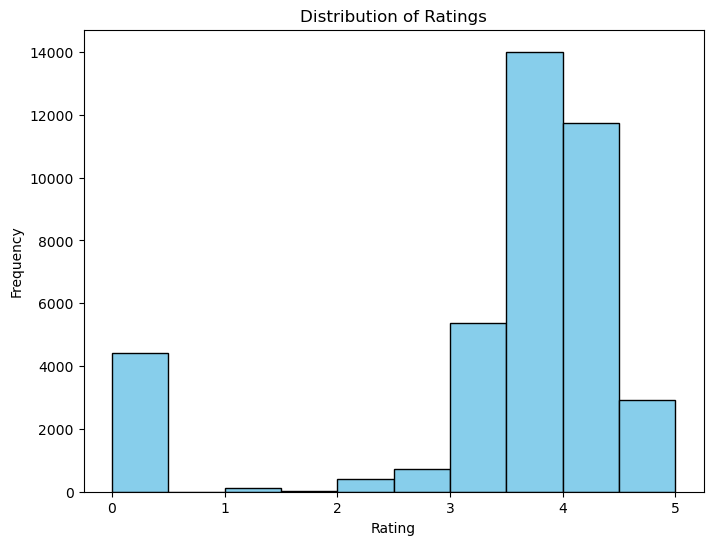

In [6]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
df['Rating'].plot(kind='hist', bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the cleaned descriptions into a matrix of TF-IDF features
X = vectorizer.fit_transform(df['cleaned_description'])


In [8]:
# Compute cosine similarity between book descriptions
similarity_matrix = cosine_similarity(X)


In [9]:
def recommend_books(book_index, num_recommendations=5):
    similar_books = list(enumerate(similarity_matrix[book_index]))  # Get the similarity of the chosen book with all others
    sorted_books = sorted(similar_books, key=lambda x: x[1], reverse=True)  # Sort by similarity score
    recommended_books = sorted_books[1:num_recommendations + 1]  # Exclude the book itself
    for i, score in recommended_books:
        print(f"Recommended Book: {df['Name'][i]}, Similarity: {score:.4f}")


In [10]:
# Example usage
book_index = 0  # Choose the index of a book to recommend similar books
recommend_books(book_index, 5)

Recommended Book: Computer Forensics, Similarity: 0.0998
Recommended Book: The Disoriented Express (Nancy Drew: Girl Detective Graphic Novels, #10), Similarity: 0.0898
Recommended Book: The Age of Reason, Similarity: 0.0887
Recommended Book: Rise of the Seventh Moon (Eberron: Heirs of Ash, #3), Similarity: 0.0885
Recommended Book: Digital Evidence and Computer Crime: Forensic Science, Computers and the Internet, Similarity: 0.0859


In [11]:
book_index = 0  # Example book index
recommended_books = recommend_books(book_index, 5)

if recommended_books is not None:
    print(recommended_books[['Title', 'Authors', 'Description', 'Similarity']])
else:
    print("No recommendations found.")

Recommended Book: Computer Forensics, Similarity: 0.0998
Recommended Book: The Disoriented Express (Nancy Drew: Girl Detective Graphic Novels, #10), Similarity: 0.0898
Recommended Book: The Age of Reason, Similarity: 0.0887
Recommended Book: Rise of the Seventh Moon (Eberron: Heirs of Ash, #3), Similarity: 0.0885
Recommended Book: Digital Evidence and Computer Crime: Forensic Science, Computers and the Internet, Similarity: 0.0859
No recommendations found.
